<a href="https://colab.research.google.com/github/Zexsteel900/StockPricePrediction/blob/main/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [ ]:
df = pdr.get_data_yahoo('SBIN.NS', start='2019-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,297.500000,300.700012,293.850006,299.600006,286.725769,11837127
2019-01-02,299.100006,302.500000,293.100006,293.899994,281.270721,25559853
2019-01-03,295.000000,295.549988,290.100006,291.100006,278.591064,17548347
2019-01-04,292.100006,299.000000,291.500000,297.649994,284.859589,19514041
2019-01-07,301.049988,301.500000,295.200012,296.299988,283.567596,14579399
...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,556.200012,12134624
2023-10-26,551.450012,552.900024,543.200012,547.000000,547.000000,19424825
2023-10-27,550.000000,562.500000,550.000000,561.150024,561.150024,10415296


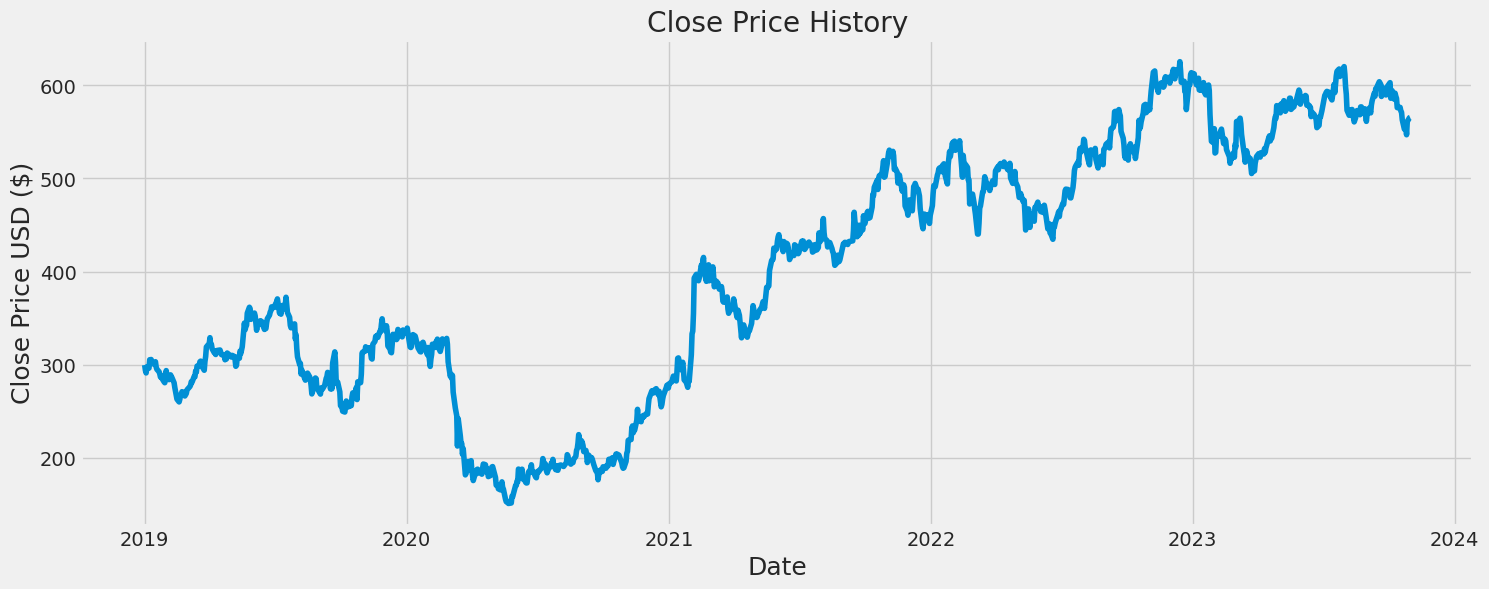

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1136

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.31338882],
       [0.30137994],
       [0.29548088],
       ...,
       [0.86442647],
       [0.87295905],
       [0.87369638]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.31338882, 0.30137994, 0.29548088, 0.3092805 , 0.30643629,
       0.32539763, 0.32539763, 0.32592433, 0.32002527, 0.31507424,
       0.31770776, 0.32086799, 0.3087538 , 0.30359214, 0.2983251 ,
       0.29369008, 0.28610553, 0.28905506, 0.28347201, 0.27546614,
       0.27335932, 0.28779102, 0.30085324, 0.28136519, 0.28041717,
       0.2818919 , 0.29116187, 0.28768564, 0.28473611, 0.27314863,
       0.26240385, 0.24491731, 0.23617404, 0.22985359, 0.23606866,
       0.24618141, 0.24681343, 0.25302856, 0.25134307, 0.2433372 ,
       0.24607603, 0.24902556, 0.25724219, 0.26461605, 0.26809228,
       0.27578215, 0.27462342, 0.28758033, 0.28663223, 0.29979983,
       0.29716631, 0.31086061, 0.3120194 , 0.32065729, 0.3222374 ,
       0.31012321, 0.30159064, 0.32160538, 0.33277148, 0.35426103])]
[0.362161584550602]

[array([0.31338882, 0.30137994, 0.29548088, 0.3092805 , 0.30643629,
       0.32539763, 0.32539763, 0.32592433, 0.32002527, 0.31507424,
       0.31770776, 0.32086799, 0.3087

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1076/1076 [==============================] - 58s 50ms/step - loss: 0.0031


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 71ms/step


40.151460699747645

<ipython-input-19-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


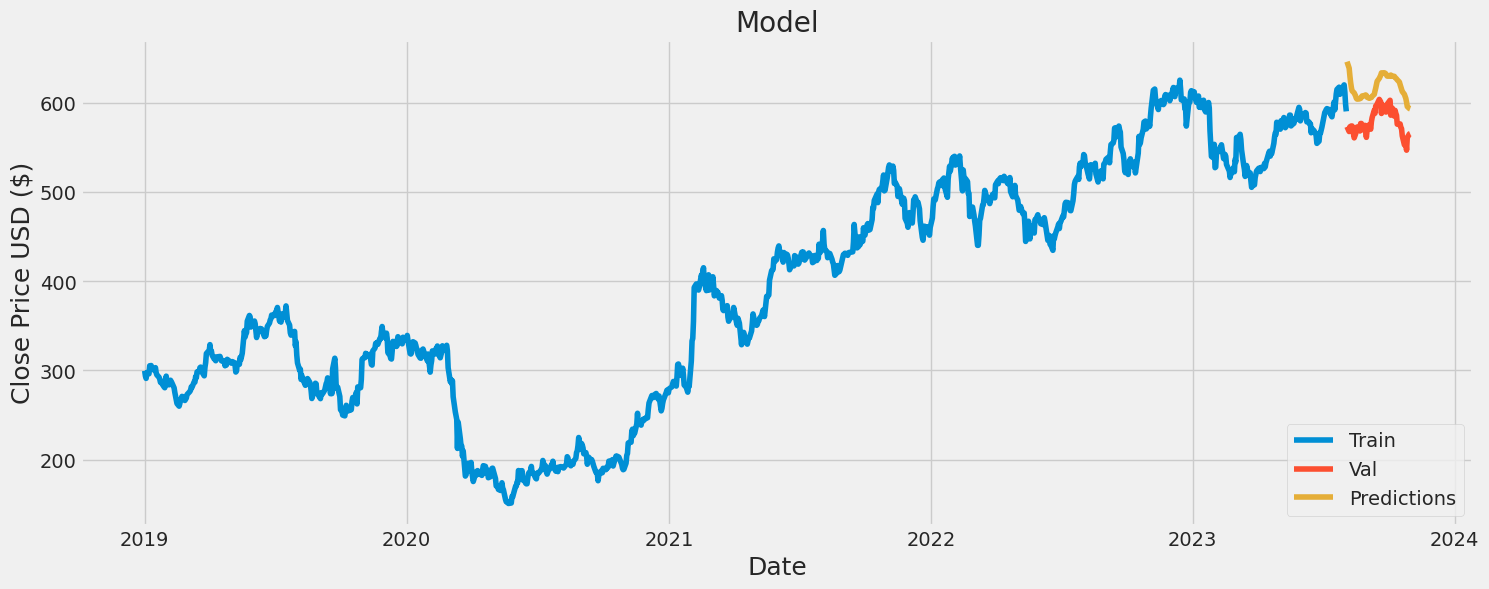

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid


,Close,Predictions
Date,,
2023-08-04,573.299988,646.226807
2023-08-07,567.900024,638.898682
2023-08-08,573.099976,630.375061
2023-08-09,573.750000,623.136475
2023-08-10,573.650024,617.580872
2023-08-11,574.150024,613.625793
2023-08-14,560.799988,611.108948
2023-08-16,565.349976,607.760132
2023-08-17,572.150024,605.168335
